In [1]:
# load dataset
import pandas as pd
df = pd.read_csv("delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0,0.000000,-2.180
1,2.37650,133.405,0,0.000000,-2.000
2,2.59380,167.850,1,0.000000,-1.740
3,2.02890,133.405,1,0.000000,-1.480
4,2.91890,187.375,1,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8,0.000000,1.144
1140,3.42130,286.114,2,0.333333,-4.925
1141,3.60960,308.333,4,0.695652,-3.893
1142,2.56214,354.815,3,0.521739,-3.790


In [67]:
df.corr()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
MolLogP,1.000000,0.468097,0.205607,0.250977,-0.827959
MolWt,0.468097,1.000000,0.394219,0.098855,-0.637324
NumRotatableBonds,0.205607,0.394219,1.000000,-0.296737,-0.238508
AromaticProportion,0.250977,0.098855,-0.296737,1.000000,-0.268108
logS,-0.827959,-0.637324,-0.238508,-0.268108,1.000000


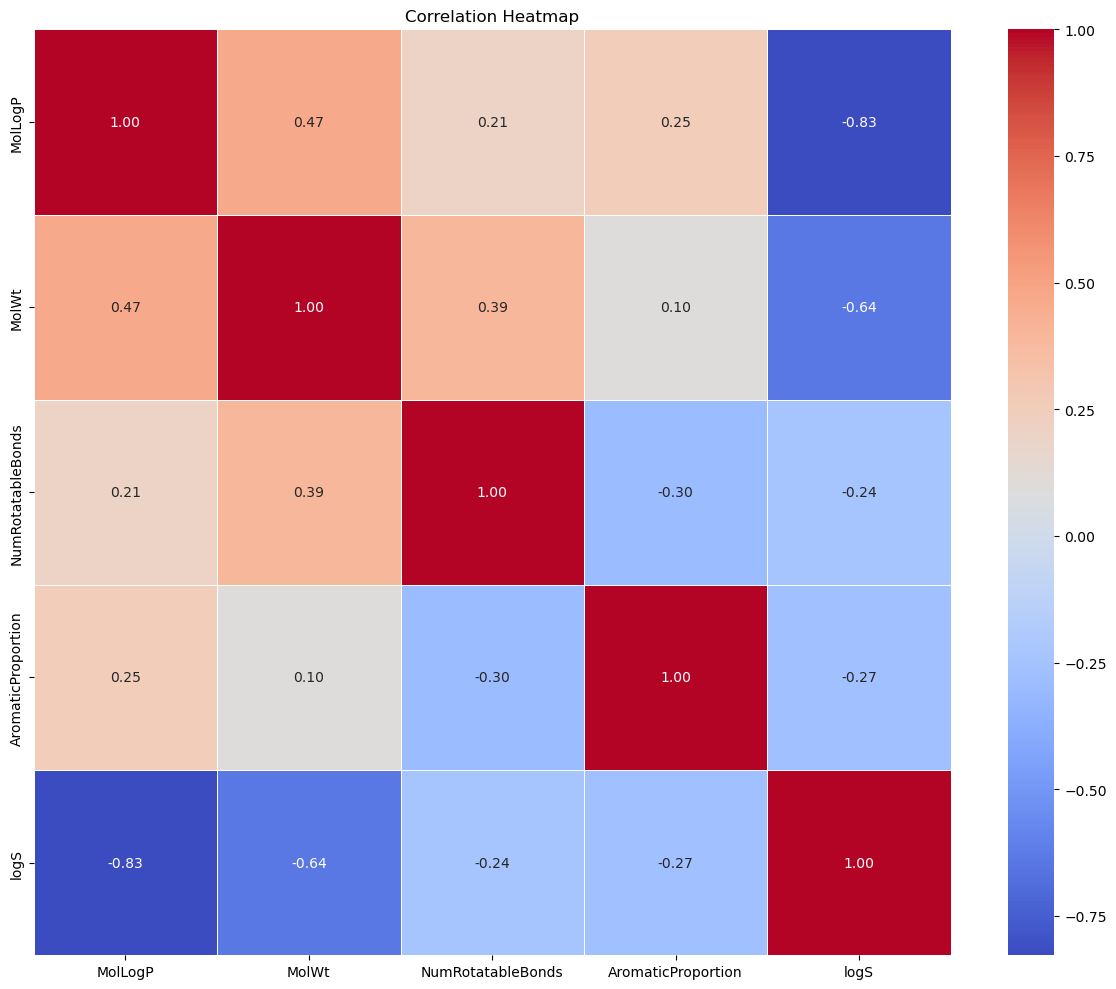

In [65]:
#correlation heatmap
import seaborn as sns
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
#data seperation

In [3]:
#seperate y from x
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [5]:
#separate x from y 
X = df.drop('logS', axis= 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0,0.000000
1,2.37650,133.405,0,0.000000
2,2.59380,167.850,1,0.000000
3,2.02890,133.405,1,0.000000
4,2.91890,187.375,1,0.000000
...,...,...,...,...
1139,1.98820,287.343,8,0.000000
1140,3.42130,286.114,2,0.333333
1141,3.60960,308.333,4,0.695652
1142,2.56214,354.815,3,0.521739


In [ ]:
#Split data as training and testing set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [8]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5,0.000000
378,-2.07850,142.070,0,0.000000
529,-0.47730,168.152,0,0.000000
546,-0.86740,154.125,0,0.000000
320,1.62150,100.161,2,0.000000
...,...,...,...,...
802,3.00254,250.301,1,0.842105
53,2.13860,82.146,3,0.000000
350,5.76304,256.348,0,0.900000
79,3.89960,186.339,10,0.000000


In [9]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7,0.000000
118,7.27400,360.882,1,0.666667
347,1.94040,145.161,0,0.909091
1123,1.98640,119.378,0,0.000000
924,1.70062,108.140,0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4,0.000000
427,6.32820,276.338,0,1.000000
711,0.04430,218.205,5,0.000000
4,2.91890,187.375,1,0.000000


In [13]:
#model building

In [15]:
#linear Regression(training the model)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#making prediction with trained model

In [19]:
y_model_train_pred = model.predict(X_train)
y_model_test_pred = model.predict(X_test)

In [21]:
y_model_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [23]:
y_model_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

In [25]:
#evaluate model performance

In [27]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [29]:
y_model_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
model_train_mae = mean_squared_error(y_train, y_model_train_pred)
model_train_r2 = r2_score(y_train, y_model_train_pred)
model_test_mae = mean_squared_error(y_test, y_model_test_pred)
model_test_r2 = r2_score(y_test, y_model_test_pred)

In [33]:
print("LR MSE(train)",model_train_mae )
print("LR R2(train)", model_train_r2)
print("LR MSE(test)",model_test_mae )
print("LR R2(test)", model_test_r2)

LR MSE(train) 1.0075362951071338
LR R2(train) 0.7645051774668614
LR MSE(test) 1.0206953660981826
LR R2(test) 0.7891616188538331


In [35]:
model_results = pd.DataFrame(['Linear Regression', model_train_mae, model_train_r2, model_test_mae, model_test_r2]).transpose()
model_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
model_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


In [37]:
#Similarly

In [39]:
model_test_mae

1.0206953660981826

In [41]:
model_test_r2

0.7891616188538331

In [43]:
model_train_mae

1.0075362951071338

In [45]:
model_train_r2

0.7645051774668614

In [47]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth =2 , random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [49]:
#applying model prediction
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)
#evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mae = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mae = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
#results
rf_results = pd.DataFrame(['Random forest', rf_train_mae, rf_train_r2, rf_test_mae, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


In [51]:
#model comparison
df_models = pd.concat([model_results, rf_results], axis = 0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random forest,1.028228,0.759669,1.407688,0.709223


In [53]:
df_models.reset_index( drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


In [55]:
#Save model
import joblib
joblib.dump(rf_results,
'random_forest_model.pkl')

['random_forest_model.pkl']

Text(0.5, 0, 'Experimental Log$')

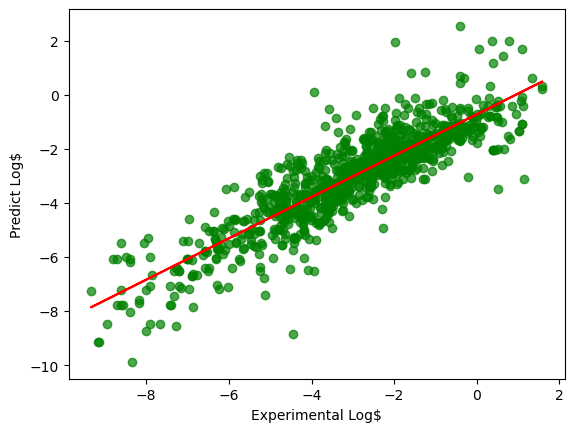

In [57]:
#Visualization on prediction
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train, y=y_model_train_pred, color= "green", alpha = 0.7)
x = np.polyfit(y_train, y_model_train_pred, 1)
p = np. poly1d(x)
plt.plot(y_train, p(y_train), color= "red")
plt.ylabel('Predict Log$')
plt.xlabel('Experimental Log$')